# MS AAI - 510 - MACHINE LEARNING FUNDAMENTALS
# Final Project - Diabetes Predictor based on CDC Health Indicators
## Team 2 - Santosh Kumar, Michael Domingo, Israel Romero Olvera
This notebook contains our analysis and model for the selected dataset. Source: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicatorsA

### Data understanding

| Variable Name         | Role    | Type    | Demographic     | Description                                                                                                                        | Units  | Missing Values |
|---------------------- |---------|---------|-----------------|------------------------------------------------------------------------------------------------------------------------------------|--------|----------------|
| ID                    | ID      | Integer |                 | Patient ID                                                                                                                         |        | no             |
| Diabetes_binary       | Target  | Binary  |                 | 0 = no diabetes 1 = prediabetes or diabetes                                                                                        |        | no             |
| HighBP                | Feature | Binary  |                 | 0 = no high BP 1 = high BP                                                                                                         |        | no             |
| HighChol              | Feature | Binary  |                 | 0 = no high cholesterol 1 = high cholesterol                                                                                       |        | no             |
| CholCheck             | Feature | Binary  |                 | 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years                                                           |        | no             |
| BMI                   | Feature | Integer |                 | Body Mass Index                                                                                                                    |        | no             |
| Smoker                | Feature | Binary  |                 | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes                      |        | no             |
| Stroke                | Feature | Binary  |                 | (Ever told) you had a stroke. 0 = no 1 = yes                                                                                      |        | no             |
| HeartDiseaseorAttack  | Feature | Binary  |                 | Coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes                                                         |        | no             |
| PhysActivity          | Feature | Binary  |                 | Physical activity in past 30 days - not including job 0 = no 1 = yes                                                               |        | no             |
| Fruits                | Feature | Binary  |                 | Consume fruit 1 or more times per day 0 = no 1 = yes                                                                              |        | no             |
| Veggies               | Feature | Binary  |                 | Consume vegetables 1 or more times per day 0 = no 1 = yes                                                                         |        | no             |
| HvyAlcoholConsump     | Feature | Binary  |                 | Heavy drinkers (adult men >14 drinks/week, women >7 drinks/week) 0 = no 1 = yes                                                   |        | no             |
| AnyHealthcare         | Feature | Binary  |                 | Any kind of health care coverage (insurance, HMO, etc.) 0 = no 1 = yes                                                            |        | no             |
| NoDocbcCost           | Feature | Binary  |                 | In past 12 months, needed to see doctor but could not because of cost? 0 = no 1 = yes                                             |        | no             |
| GenHlth               | Feature | Integer |                 | General health (1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor)                                                       |        | no             |
| MentHlth              | Feature | Integer |                 | Days mental health not good in past 30 days (1-30)                                                                                |        | no             |
| PhysHlth              | Feature | Integer |                 | Days physical health not good in past 30 days (1-30)                                                                              |        | no             |
| DiffWalk              | Feature | Binary  |                 | Serious difficulty walking or climbing stairs? 0 = no 1 = yes                                                                     |        | no             |
| Sex                   | Feature | Binary  | Sex             | 0 = female 1 = male                                                                                                               |        | no             |
| Age                   | Feature | Integer | Age             | 13-level age category (_AGEG5YR see codebook): 1 = 18-24, 9 = 60-64, 13 = 80+                                                    |        | no             |
| Education             | Feature | Integer | Education Level | Education level (EDUCA see codebook): 1 = Never attended/Kindergarten, 2 = Grades 1-8, 3 = Grades 9-11, 4 = HS/GED, 5 = College 1-3 yrs, 6 = College grad |        | no             |
| Income                | Feature | Integer | Income          | Income scale (INCOME2 see codebook): 1 = <$10k, 5 = <$35k, 8 = $75k+                                                             |        | no             |

**Note:**  
_AGEG5YR is a calculated variable for a fourteen-level age category, derived from AGE.

| Value | Age Group              | Description                                                              |
|-------|------------------------|--------------------------------------------------------------------------|
| 1     | Age 18 to 24           | Respondents with age between 18 and 24 years (18 ≤ AGE ≤ 24)             |
| 2     | Age 25 to 29           | Respondents with age between 25 and 29 years (25 ≤ AGE ≤ 29)             |
| 3     | Age 30 to 34           | Respondents with age between 30 and 34 years (30 ≤ AGE ≤ 34)             |
| 4     | Age 35 to 39           | Respondents with age between 35 and 39 years (35 ≤ AGE ≤ 39)             |
| 5     | Age 40 to 44           | Respondents with age between 40 and 44 years (40 ≤ AGE ≤ 44)             |
| 6     | Age 45 to 49           | Respondents with age between 45 and 49 years (45 ≤ AGE ≤ 49)             |
| 7     | Age 50 to 54           | Respondents with age between 50 and 54 years (50 ≤ AGE ≤ 54)             |
| 8     | Age 55 to 59           | Respondents with age between 55 and 59 years (55 ≤ AGE ≤ 59)             |
| 9     | Age 60 to 64           | Respondents with age between 60 and 64 years (60 ≤ AGE ≤ 64)             |
| 10    | Age 65 to 69           | Respondents with age between 65 and 69 years (65 ≤ AGE ≤ 69)             |
| 11    | Age 70 to 74           | Respondents with age between 70 and 74 years (70 ≤ AGE ≤ 74)             |
| 12    | Age 75 to 79           | Respondents with age between 75 and 79 years (75 ≤ AGE ≤ 79)             |
| 13    | Age 80 or older        | Respondents with age between 80 and 99 years (80 ≤ AGE ≤ 99)             |
| 14    | Don’t know/Refused/Missing | Respondents who didn’t know, were not sure, or refused to report    |


### Imports

In [6]:
# Standard libraries
import os
import warnings
import joblib

# Data handling
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Data source
from ucimlrepo import fetch_ucirepo

# Scikit-learn: Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Scikit-learn: Models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# XGBoost
from xgboost import XGBClassifier as XGBoostClassifier

# Scikit-learn: Metrics and Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, average_precision_score,
    roc_curve, auc, RocCurveDisplay,
    precision_recall_curve, make_scorer
)

# Scikit-learn: Warnings
from sklearn.exceptions import ConvergenceWarning

# Sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from IPython.display import display


### Config & Warnings

In [7]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning, message="The SAMME.R algorithm.*")
sns.set_theme()
shap.initjs()
RANDOM_SEED = 42

### Data Loading & Preprocessing
After bringing in the CDC diabetes dataset, one of the first things we did was visualize the distribution of our target variable, Diabetes_binary, with a simple bar plot. This chart basically counts up how many people in our data do or do not have diabetes. Right away, you’ll notice a huge imbalance: the vast majority of individuals are not diabetic, and only a smaller fraction are. 

In [8]:
def load_and_prepare_data():
    cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
    df = cdc_diabetes_health_indicators.data.original.dropna()
    X = cdc_diabetes_health_indicators.data.features.loc[df.index]
    y = cdc_diabetes_health_indicators.data.targets.loc[df.index]
    return df, X, y

def data_count(df):
    df['Diabetes_binary'].value_counts().sort_index().plot(kind='bar', title = 'Diabetes')
    plt.xticks(rotation = 0)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print(f"Data count: {df['Diabetes_binary'].value_counts()}")

def split_data(X, y, test_size=0.2, random_state=RANDOM_SEED):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def select_features(X, columns):
    return X[columns]

### Run EDA
Moving into exploratory data analysis, we used a correlation heatmap, which is basically a colored grid that shows how every feature in our dataset relates to every other feature—including our target. Each square in the grid tells us whether two features move together or not. For example, a strong positive value between “HighBP” and “Diabetes_binary” means people with high blood pressure are more likely to be diabetic. Meanwhile, values close to zero mean there’s little to no connection. This heatmap is a great tool for spotting which features might help our predictions and for warning us if some features are too similar and could cause problems in modeling.


In [9]:
def run_eda(df):
    print("\n===== Data Head =====")
    print(df.head())
    print("\n===== Data Description =====")
    print(df.describe())
    print("\n===== Data Info =====")
    print(df.info())
    # print("\n===== Value Counts for Each Column =====")
    # for col in df.columns:
    #     print(f"\n{col} value counts:")
    #     print(df[col].value_counts())
    # Correlation heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(df.drop(columns=['ID'], errors='ignore').corr(), cmap='BrBG', linewidths=2, annot=True, fmt=".1f")
    plt.title('Correlation Heatmap')
    plt.show()
    # Bar chart: feature correlation with target
    if 'Diabetes_binary' in df.columns:
        corr_matrix = df.drop(columns=['ID'], errors='ignore').corr()
        target_corr = corr_matrix['Diabetes_binary'].drop('Diabetes_binary')
        plt.figure(figsize=(10, 5))
        target_corr.sort_values(ascending=False).plot(kind='bar', color='teal')
        plt.title('Feature Correlation with Diabetes_binary')
        plt.ylabel('Correlation Coefficient')
        plt.xlabel('Feature')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    # Feature distributions
    features = df.drop(columns=['Diabetes_binary', 'ID'], errors='ignore')
    plt.figure(figsize=(20, 16))
    for i, col in enumerate(features.columns):
        plt.subplot(6, 4, i + 1)
        sns.histplot(features[col])
        plt.xlabel(col)
        plt.ylabel('count')
        plt.grid()
        plt.tight_layout()
    plt.show()


### Resampling Utilities

In [10]:
def resample_data(X, y, method=None):
    if method == 'under':
        sampler = RandomUnderSampler(random_state=RANDOM_SEED)
        X_res, y_res = sampler.fit_resample(X, y)
        return X_res, y_res
    elif method == 'smote':
        sampler = SMOTE(random_state=RANDOM_SEED)
        X_res, y_res = sampler.fit_resample(X, y)
        return X_res, y_res
    else:
        return X, y

### Model Training & Evaluation
We compared several different scenarios to understand how data balance and hyperparameter tuning affect our results.
Here’s what we did:
Original Data with Tuning:
We trained each model—Logistic Regression, Random Forest, XGBoost, and Gradient Boosting—on the original, imbalanced data, using grid search to tune their parameters.
Undersampling:
Since our data has way more non-diabetic cases than diabetic, we used random undersampling to reduce the size of the majority class, making the classes balanced. Then we trained and tuned the same models.
SMOTE (Synthetic Minority Oversampling Technique):
Here, we used a technique to increase the minority class by generating synthetic diabetic samples, again training and tuning our models.
Models Without Tuning:
We also wanted to see how much tuning matters, so we trained all four models again—on all three data versions—using their default hyperparameters.

In [11]:
def get_models():
    return {
        'Logistic Regression': LogisticRegression(random_state=RANDOM_SEED, max_iter=1000),
        'Random Forest': RandomForestClassifier(random_state=RANDOM_SEED),
        'XG Boost Classifier': XGBoostClassifier(random_state=RANDOM_SEED, eval_metric='logloss'),
        'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=RANDOM_SEED),
    }

def get_param_grids():
    return {
        'Logistic Regression': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs'],
            'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 3}]
        },
        'Random Forest': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'class_weight': ['balanced', 'balanced_subsample']
        },
        'XG Boost Classifier': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 6, 10],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0],
            'scale_pos_weight': [1, 2, 3]
        },
        'Gradient Boosting Classifier': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 1.0]
        }
    }

def tune_model(model, param_grid, X_train, y_train):
    scorer = make_scorer(roc_auc_score)
    grid_search = GridSearchCV(
        model,
        param_grid,
        cv=3,
        scoring=scorer,
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(X_train, y_train.squeeze())
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    return grid_search.best_estimator_

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, cm, y_pred

def save_model(model, name, save_dir='../models'):
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.join(save_dir, f"{name.replace(' ', '_')}_model.pkl")
    joblib.dump(model, filename)
    print(f"Saved {name} to {filename}")

def plot_shap_feature_importance(model, X, max_display=11, title="SHAP Feature Importance (Bar Chart)"):
    # Ensure X is a DataFrame and columns match model training
    feature_names = list(X.columns)
    X_array = X.values

    # Use TreeExplainer for tree-based models
    if hasattr(model, "feature_importances_"):
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_array)
        # For tree models, shap_values is (n_samples, n_features)
        shap.summary_plot(shap_values, X, feature_names=feature_names, plot_type="bar", max_display=max_display, show=False)
    else:
        explainer = shap.Explainer(model, X)
        shap_values = explainer(X)
        shap.plots.bar(shap_values, max_display=max_display, show=False)
    plt.title(title)
    plt.show()


def plot_all_confusion_matrices(trained_models, X_test, y_test):
    n = len(trained_models)
    cols = 2
    rows = (n + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
    axes = axes.flatten()
    for i, (model_name, model) in enumerate(trained_models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
        axes[i].set_title(f"{model_name} (Acc: {accuracy_score(y_test, y_pred):.2f})")
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

def plot_all_roc_pr_curves(trained_models, X_test, y_test):
    plt.figure(figsize=(12, 10))
    for model_name, model in trained_models.items():
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.subplot(2, 1, 1)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
        # PR Curve
        precision, recall, _ = precision_recall_curve(y_test, y_score)
        avg_precision = average_precision_score(y_test, y_score)
        plt.subplot(2, 1, 2)
        plt.plot(recall, precision, lw=2, label=f'{model_name} (AP = {avg_precision:.2f})')
    plt.subplot(2, 1, 1)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.subplot(2, 1, 2)
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

### Main Experiment Pipeline
After training our models, we use confusion matrices to really see how each one is performing. Each confusion matrix is a simple 2x2 table that tells us not just how many predictions were right, but what kind of mistakes the model made. The top left cell counts the people correctly identified as not diabetic, and the bottom right shows the correctly identified diabetics. The off-diagonal cells tell us about false alarms and, more importantly, the missed real cases—which is a big concern in healthcare. By comparing these grids across different models, we get a much clearer picture than we’d get from accuracy alone.

The ROC curve is a classic way to see how well our models distinguish between diabetic and non-diabetic cases at various thresholds. It plots the true positive rate against the false positive rate, and the closer the curve hugs the top-left corner, the better the model is. If the curve follows the diagonal, it’s basically guessing. We also get an AUC score, which tells us, in one number, how good the model is overall—where 1 is perfect and 0.5 is random. For our best models, an AUC around 0.83 is really strong, especially given the difficulty of the task.

Because diabetes cases are rare in the data, the precision-recall curve is another super important graph. Here, we’re balancing two things: how many real cases we’re catching (recall), and how many of the cases we label as diabetic are actually correct (precision). When the data is imbalanced, this curve gives a much more honest look at performance than ROC curves alone. A high area under this curve means our model isn’t just accurate overall, but it’s actually catching diabetics without too many false alarms—a crucial tradeoff in real-world healthcare. A value of 0.43 on the precision-recall curve means that, on average, 43% of the positive predictions made by our model are actually correct, when balancing both precision and recall across all possible thresholds.


In [12]:
def model_training_with_tuning(X_train, y_train, X_test, y_test, resample_method=None, axes_cmap='Greens'):
    models = get_models()
    param_grids = get_param_grids()
    X_res, y_res = resample_data(X_train, y_train, method=resample_method)
    results = []
    trained_models = {}
    num_models = len(models)
    cols = 2
    rows = (num_models + cols - 1) // cols
    for i, (model_name, model) in enumerate(models.items()):
        print(f"\nTraining {model_name} ({'resampled' if resample_method else 'original'})...")
        tuned_model = tune_model(model, param_grids[model_name], X_res, y_res)
        trained_models[model_name] = tuned_model
        acc, prec, rec, f1, cm, y_pred = evaluate_model(tuned_model, X_test, y_test)
        if hasattr(tuned_model, "predict_proba"):
            y_score = tuned_model.predict_proba(X_test)[:, 1]
        else:
            y_score = tuned_model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
        avg_precision = average_precision_score(y_test, y_score)
        results.append([model_name, acc, prec, rec, f1, roc_auc, avg_precision])
        save_model_name = model_name.replace(' ', '_') + ('_resampled_' + resample_method if resample_method else '_original')
        save_model(tuned_model, save_model_name)
    results_df = pd.DataFrame(results, columns=['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Avg Precision'])
    print(results_df.sort_values(by='Test Accuracy', ascending=False))
    # All confusion matrices in a grid
    plot_all_confusion_matrices(trained_models, X_test, y_test)
    # All ROC and PR curves in a grid
    plot_all_roc_pr_curves(trained_models, X_test, y_test)
    # SHAP plots
    # for model_name, model in trained_models.items():
    #     print(f"SHAP Feature Importance for {model_name}:")
    #     plot_shap_feature_importance(model, X_test, title=f"SHAP Feature Importance: {model_name}")
    return results_df, trained_models

def model_training_with_no_tuning(X_train, y_train, X_test, y_test, resample_method=None, axes_cmap='Oranges'):
    models = get_models()
    X_res, y_res = resample_data(X_train, y_train, method=resample_method)
    results = []
    trained_models = {}
    num_models = len(models)
    cols = 2
    rows = (num_models + cols - 1) // cols
    for i, (model_name, model) in enumerate(models.items()):
        print(f"\nTraining {model_name} (no tuning, {'resampled' if resample_method else 'original'})...")
        model.fit(X_res, y_res.squeeze())
        acc, prec, rec, f1, cm, y_pred = evaluate_model(model, X_test, y_test)
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        roc_auc = roc_auc_score(y_test, y_score)
        avg_precision = average_precision_score(y_test, y_score)
        results.append([model_name, acc, prec, rec, f1, roc_auc, avg_precision])
        trained_models[model_name] = model
        save_model_name = model_name.replace(' ', '_') + '_no_tuning' + ('_resampled_' + resample_method if resample_method else '_original')
        save_model(model, save_model_name)
    results_df = pd.DataFrame(results, columns=['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Avg Precision'])
    print(results_df.sort_values(by='Test Accuracy', ascending=False))
    # All confusion matrices in a grid
    plot_all_confusion_matrices(trained_models, X_test, y_test)
    # All ROC and PR curves in a grid
    plot_all_roc_pr_curves(trained_models, X_test, y_test)
    # SHAP plots
    # for model_name, model in trained_models.items():
    #     print(f"SHAP Feature Importance for {model_name} (no tuning):")
    #     plot_shap_feature_importance(model, X_test, title=f"SHAP Feature Importance: {model_name} (no tuning)")
    return results_df, trained_models




### Main

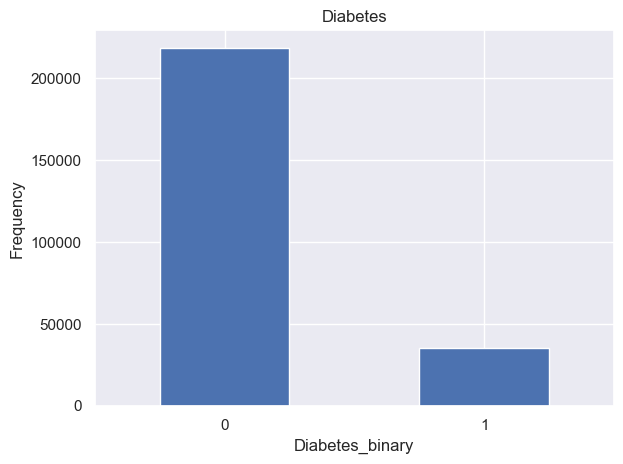

Data count: Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64

===== Data Head =====
   ID  Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0   0                0       1         1          1   40       1       0   
1   1                0       0         0          0   25       1       0   
2   2                0       1         1          1   28       0       0   
3   3                0       1         0          1   27       0       0   
4   4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  ...  AnyHealthcare  NoDocbcCost  \
0                     0             0  ...              1            0   
1                     0             1  ...              0            1   
2                     0             0  ...              1            1   
3                     0             1  ...              1            0   
4                     0             1  ...              1            0  

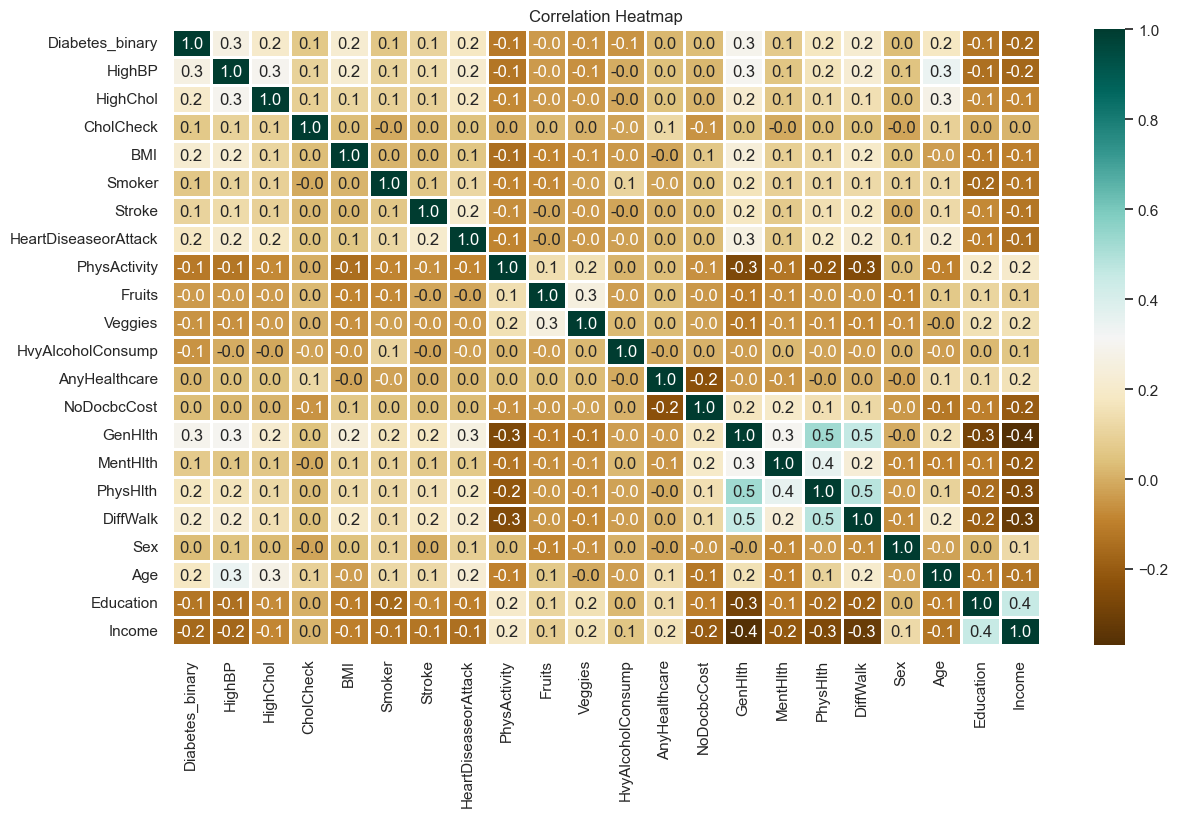

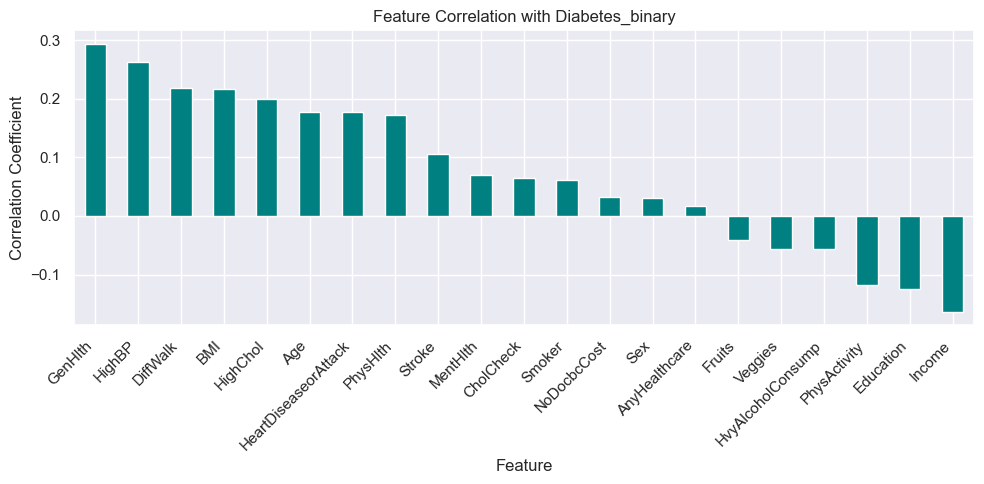

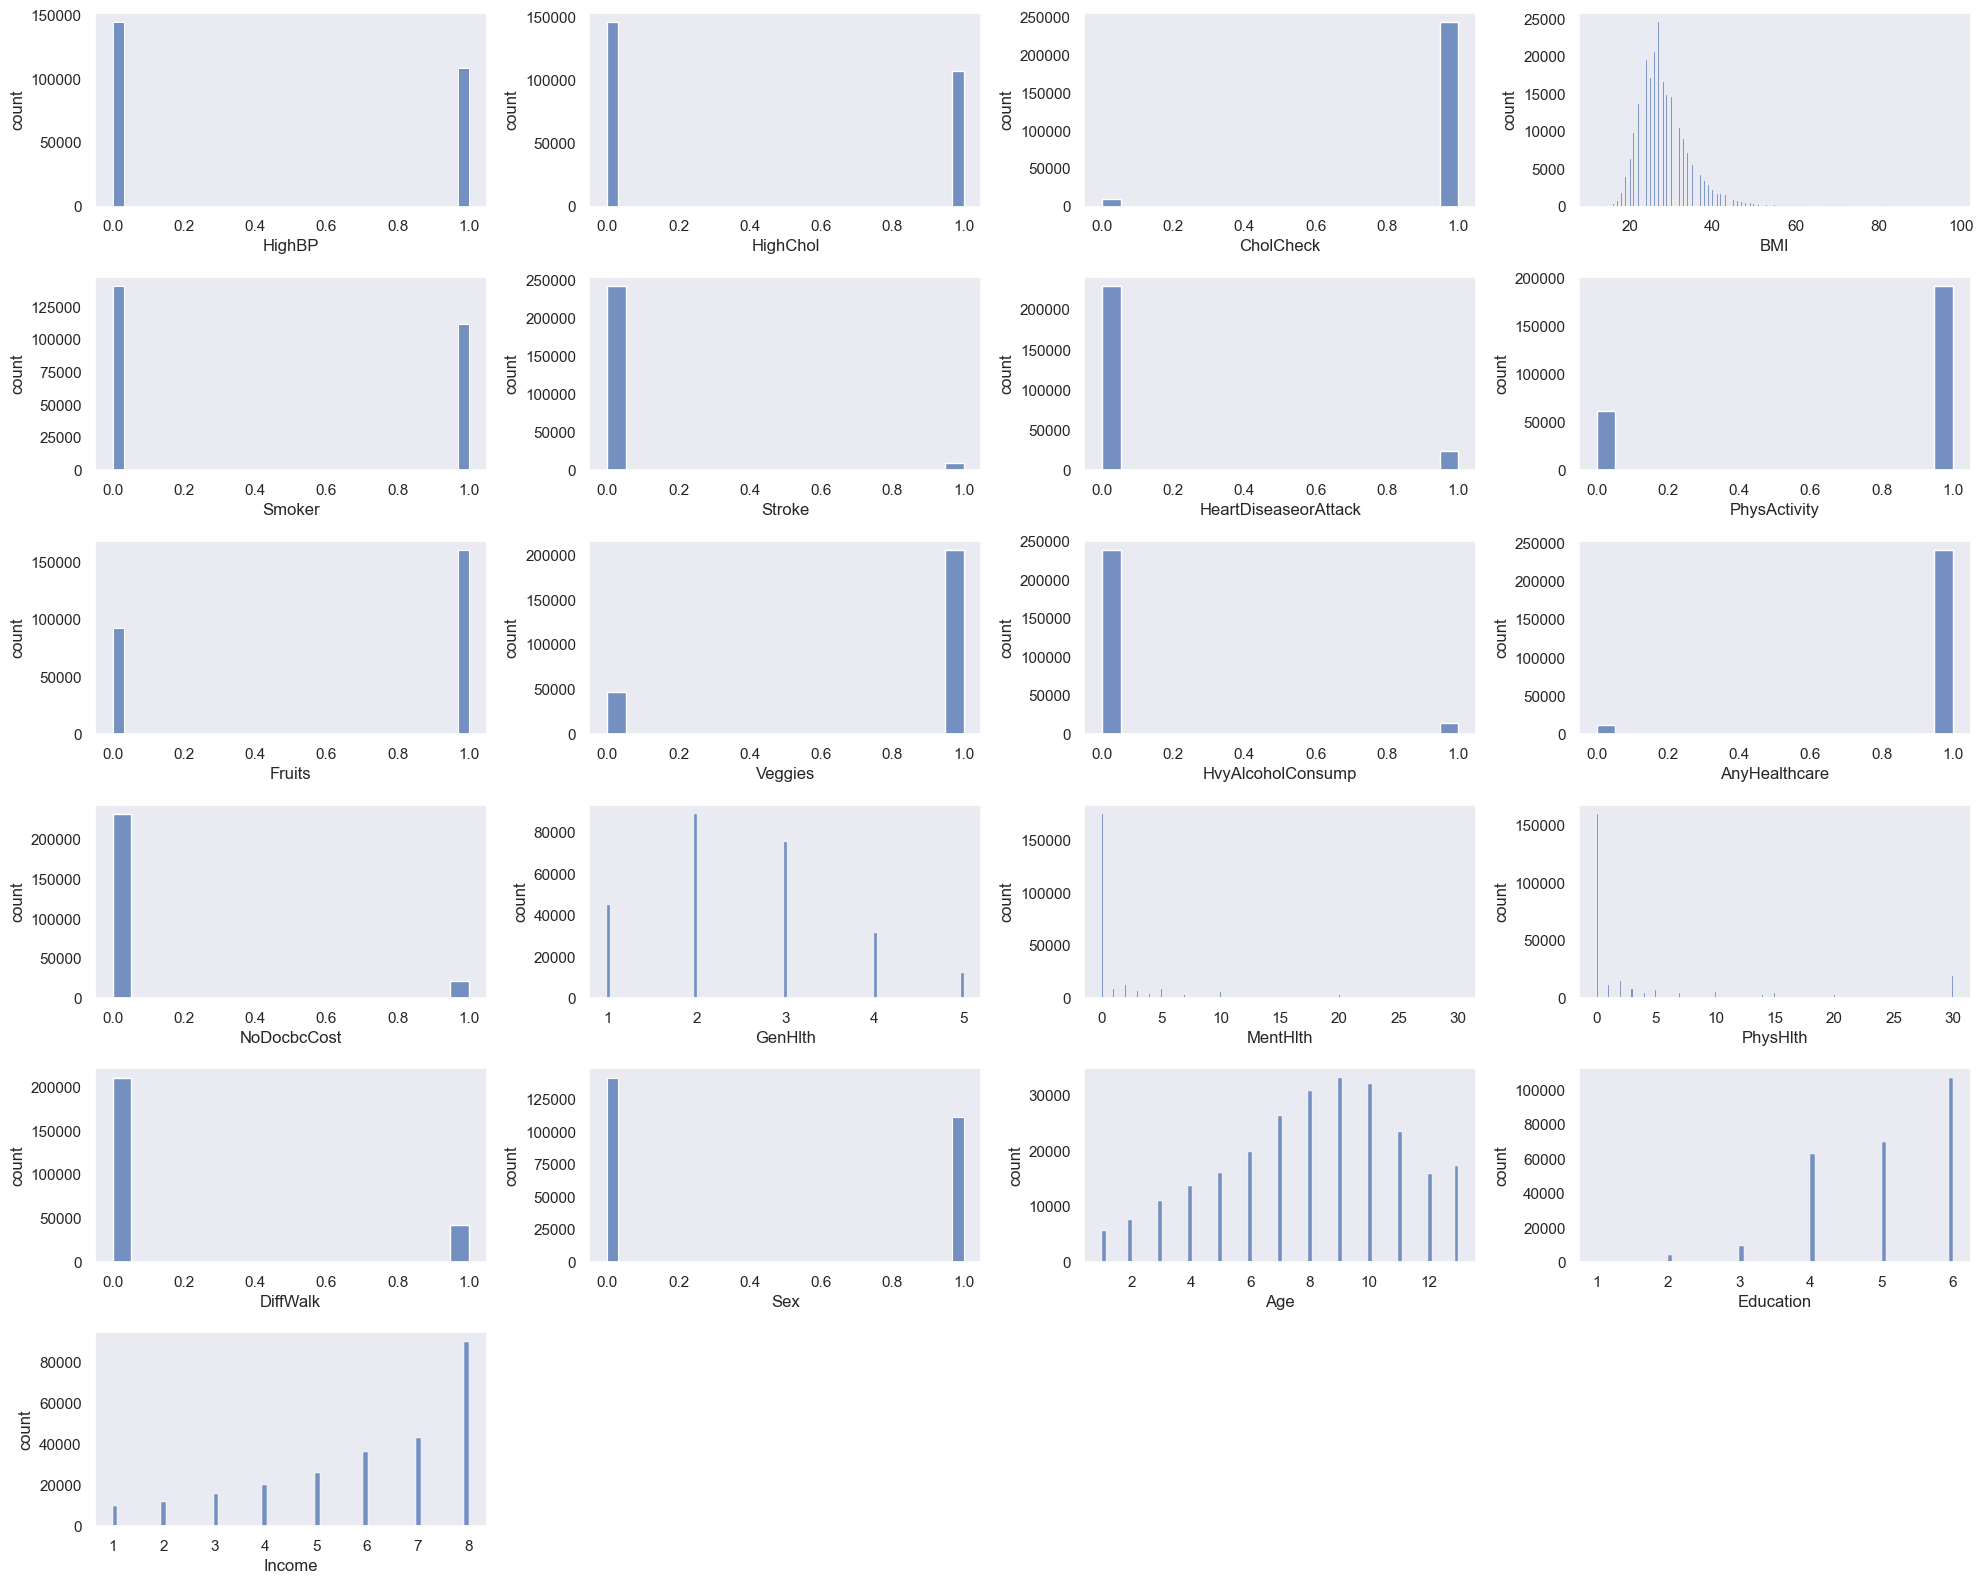

In [13]:
df, X, y = load_and_prepare_data()
data_count(df)
selected_columns = [
    'GenHlth','HighBP','Age','BMI','HighChol','Sex','Income',
    'HvyAlcoholConsump','CholCheck','PhysHlth','HeartDiseaseorAttack'
]
run_eda(df)

In [14]:
all_results = []


### Train model on original (unbalanced) data



Training Logistic Regression (original)...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'C': 100, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best CV score: 0.7446
Saved Logistic_Regression_original to ../models/Logistic_Regression_original_model.pkl

Training Random Forest (original)...
Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/santoshkumar/envs/ai/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best CV score: 0.7467
Saved Random_Forest_original to ../models/Random_Forest_original_model.pkl

Training XG Boost Classifier (original)...
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'scale_pos_weight': 3, 'subsample': 0.8}
Best CV score: 0.7188
Saved XG_Boost_Classifier_original to ../models/XG_Boost_Classifier_original_model.pkl

Training Gradient Boosting Classifier (original)...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best CV score: 0.5754
Saved Gradient_Boosting_Classifier_original to ../models/Gradient_Boosting_Classifier_original_model.pkl
                          Model  Test Accuracy  Precision    Recall  F1-Score  \
3  Gradient Boosting Classifier  

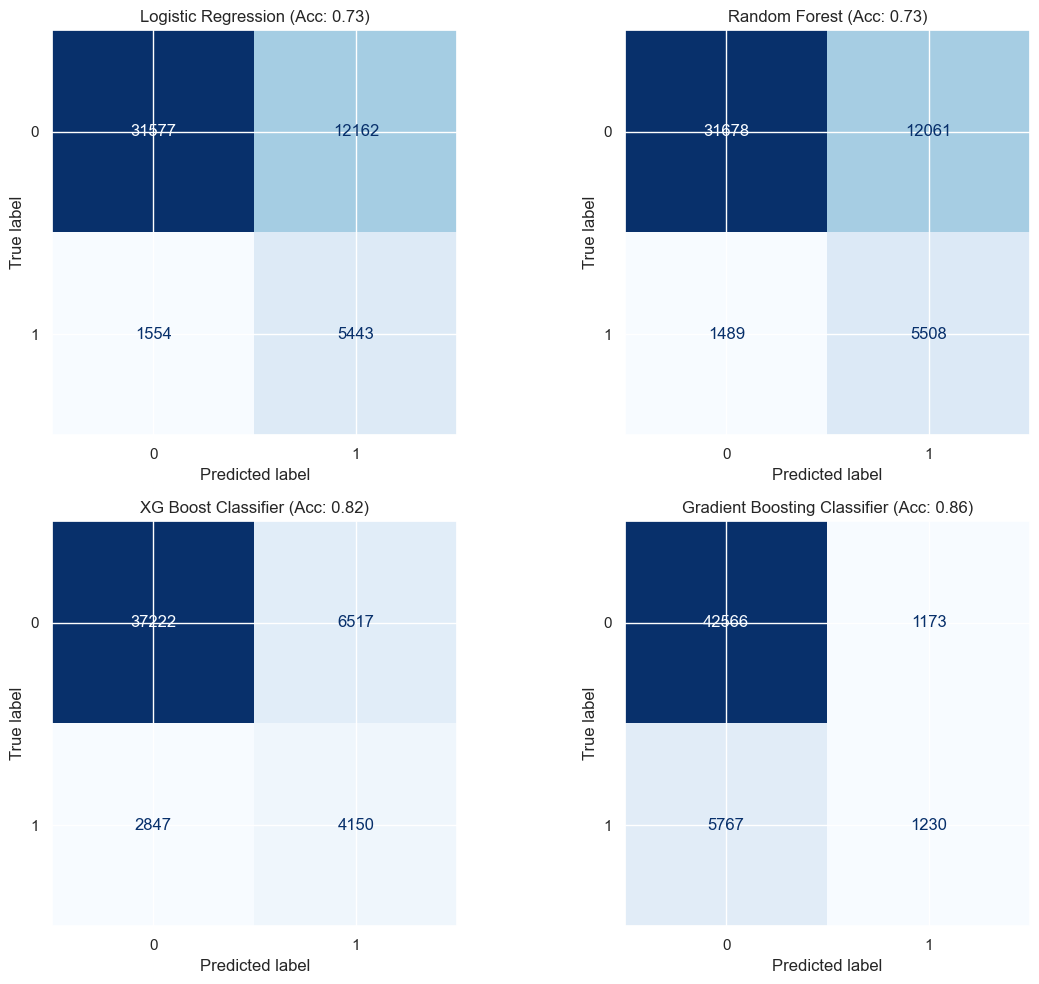

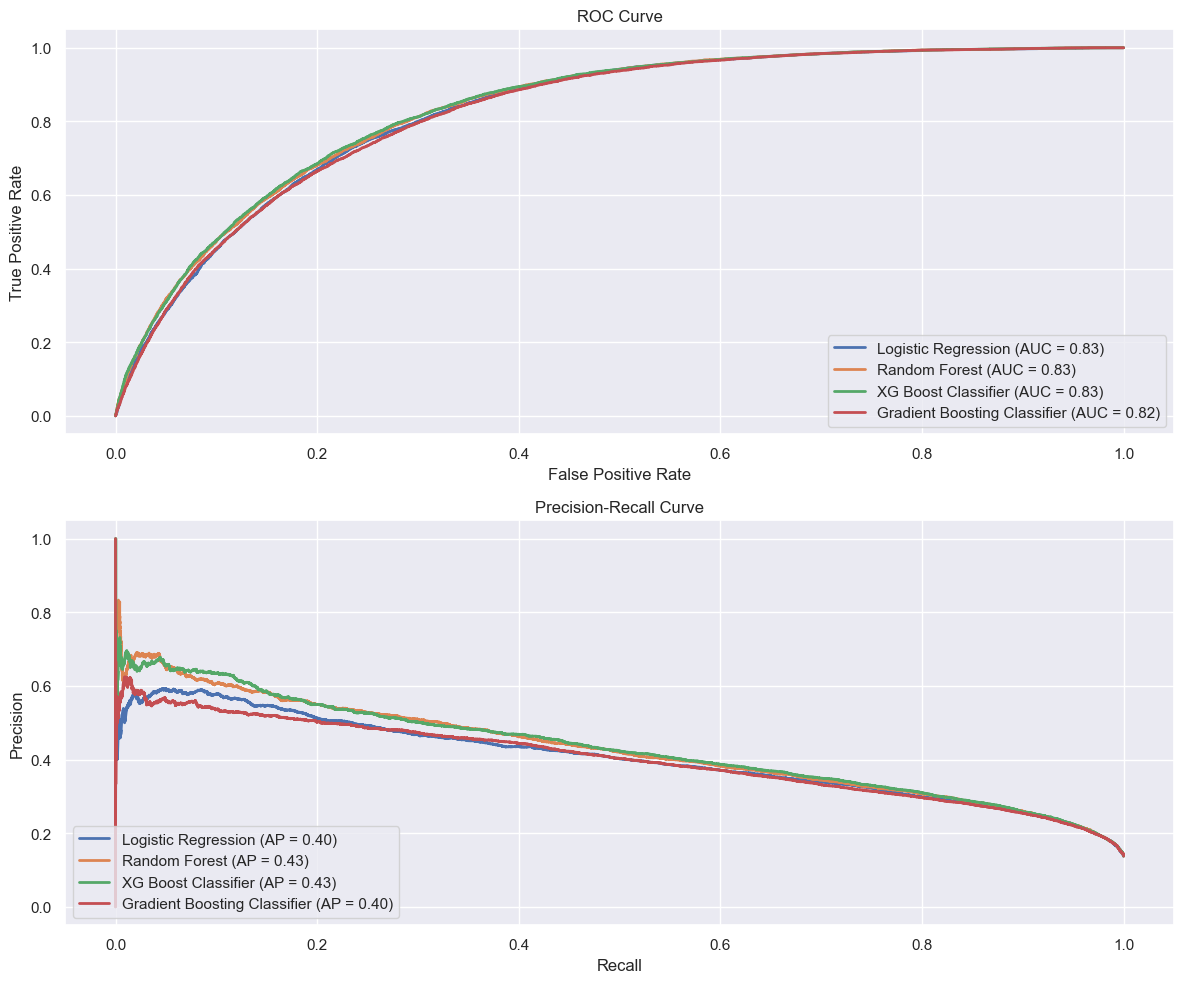

In [15]:


X_train, X_test, y_train, y_test = split_data(X[selected_columns], y)
res_df, _ = model_training_with_tuning(X_train, y_train, X_test, y_test, resample_method=None, axes_cmap='Greens')
res_df['Resampling'] = 'Original'
res_df['Tuning'] = 'Tuned'
all_results.append(res_df)

### Training model with Undersampling


Training Logistic Regression (resampled)...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'C': 10, 'class_weight': 'balanced', 'solver': 'liblinear'}
Best CV score: 0.7440
Saved Logistic_Regression_resampled_under to ../models/Logistic_Regression_resampled_under_model.pkl

Training Random Forest (resampled)...
Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/santoshkumar/envs/ai/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'class_weight': 'balanced_subsample', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}
Best CV score: 0.7475
Saved Random_Forest_resampled_under to ../models/Random_Forest_resampled_under_model.pkl

Training XG Boost Classifier (resampled)...
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}
Best CV score: 0.7489
Saved XG_Boost_Classifier_resampled_under to ../models/XG_Boost_Classifier_resampled_under_model.pkl

Training Gradient Boosting Classifier (resampled)...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best CV score: 0.7494
Saved Gradient_Boosting_Classifier_resampled_under to ../models/Gradient_Boosting_Classifier_resampled_under_model.pkl
                          Model  Test Accuracy  Precision    Recall  F

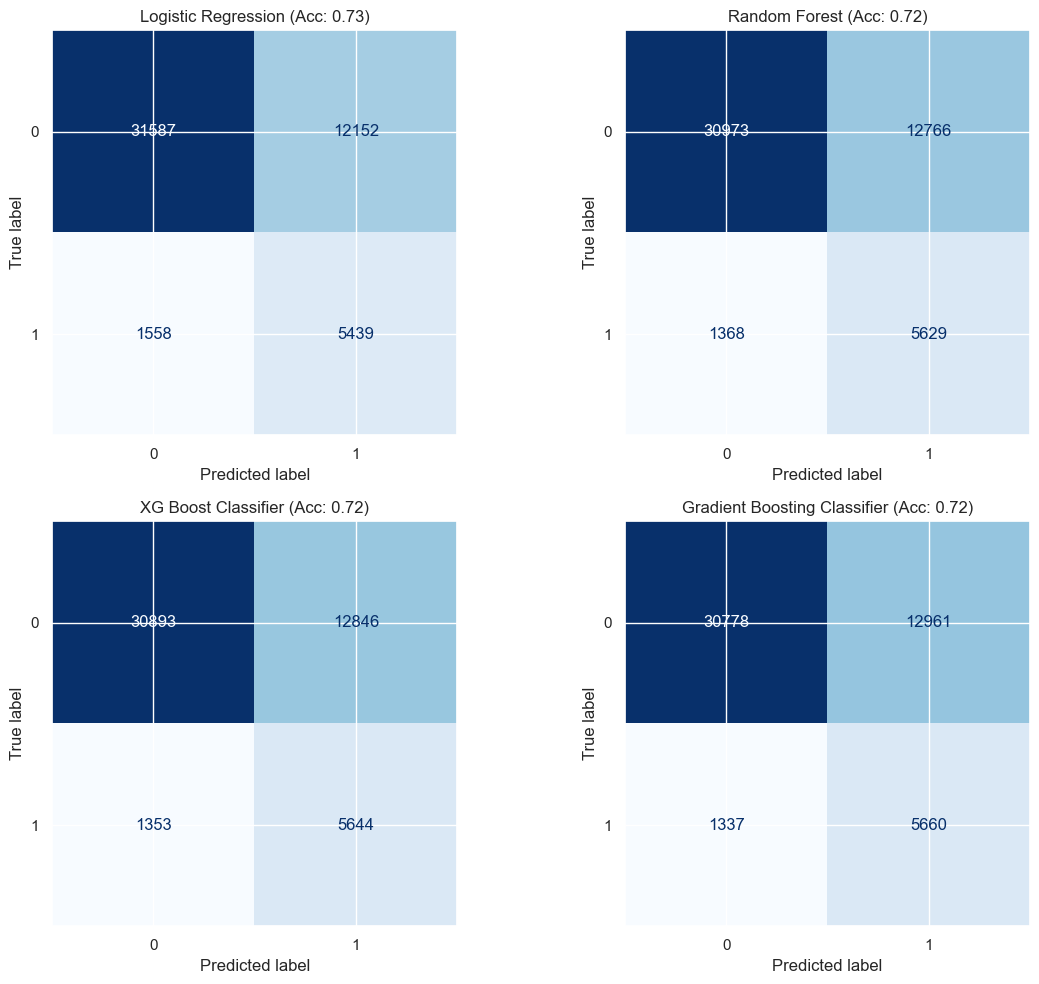

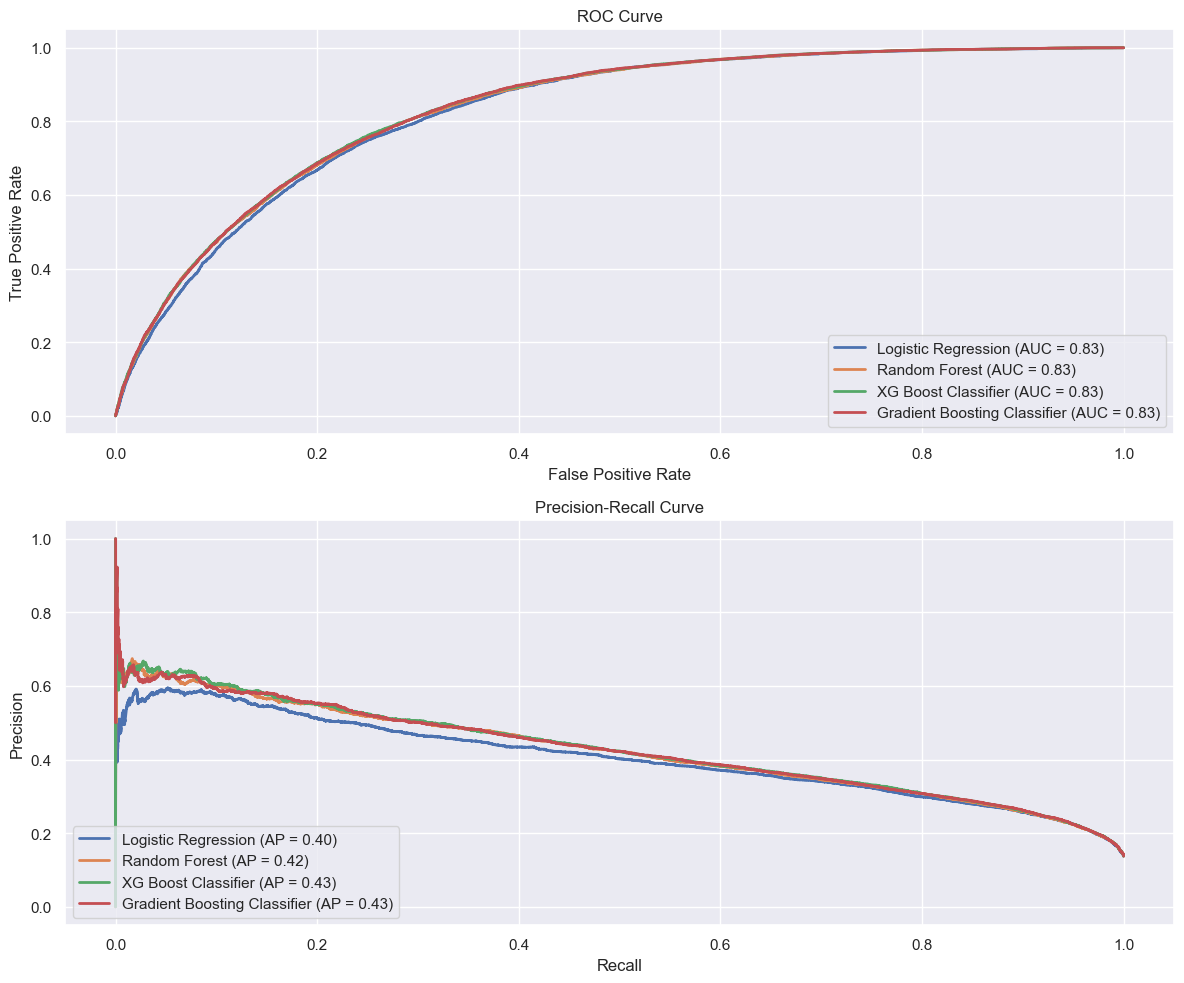

In [16]:

res_df, _ = model_training_with_tuning(X_train, y_train, X_test, y_test, resample_method='under', axes_cmap='Blues')
res_df['Resampling'] = 'Under'
res_df['Tuning'] = 'Tuned'
all_results.append(res_df)

### Training model with SMOTE Oversampling


Training Logistic Regression (resampled)...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'C': 100, 'class_weight': 'balanced', 'solver': 'lbfgs'}
Best CV score: 0.7285
Saved Logistic_Regression_resampled_smote to ../models/Logistic_Regression_resampled_smote_model.pkl

Training Random Forest (resampled)...
Fitting 3 folds for each of 54 candidates, totalling 162 fits


/Users/santoshkumar/envs/ai/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.8299
Saved Random_Forest_resampled_smote to ../models/Random_Forest_resampled_smote_model.pkl

Training XG Boost Classifier (resampled)...
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 300, 'scale_pos_weight': 1, 'subsample': 0.8}
Best CV score: 0.8077
Saved XG_Boost_Classifier_resampled_smote to ../models/XG_Boost_Classifier_resampled_smote_model.pkl

Training Gradient Boosting Classifier (resampled)...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best CV score: 0.7652
Saved Gradient_Boosting_Classifier_resampled_smote to ../models/Gradient_Boosting_Classifier_resampled_smote_model.pkl
                          Model  Test Accuracy  Precision    Recall  F1-Score

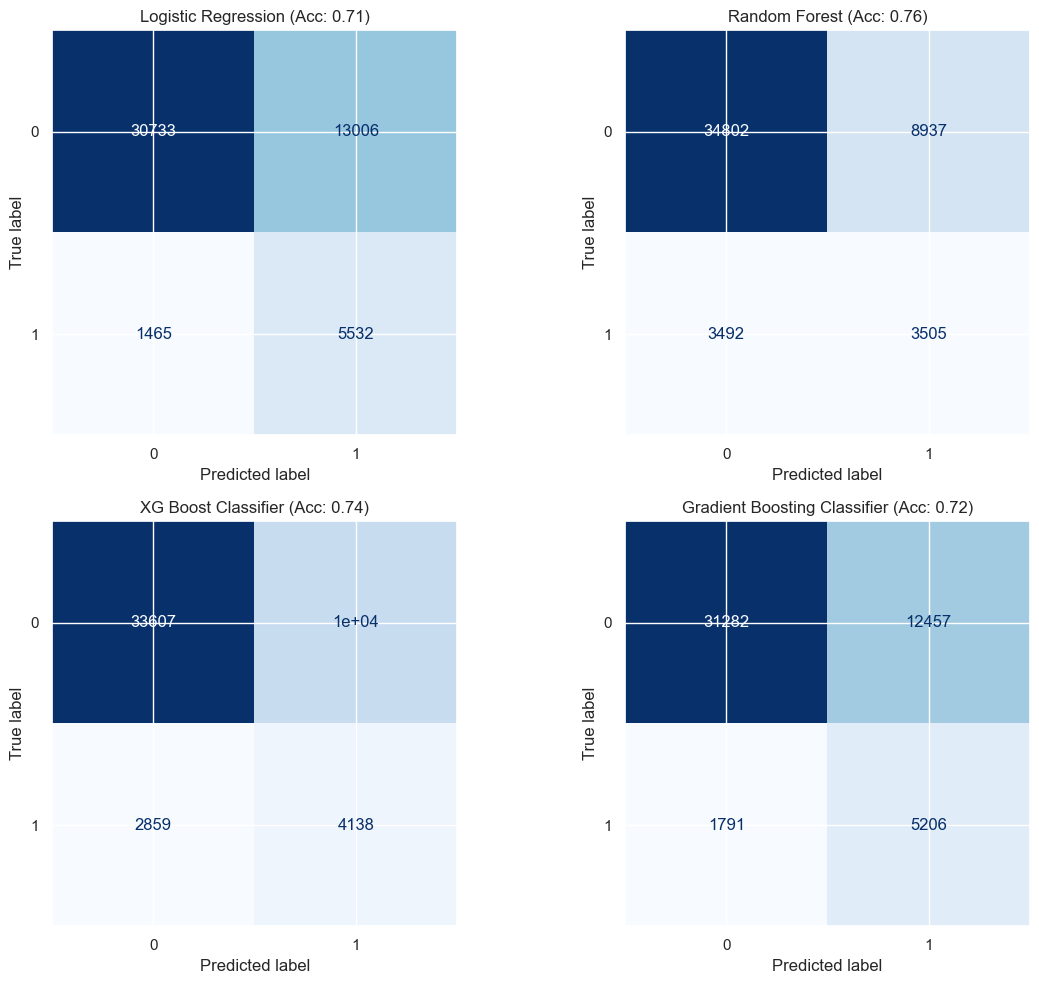

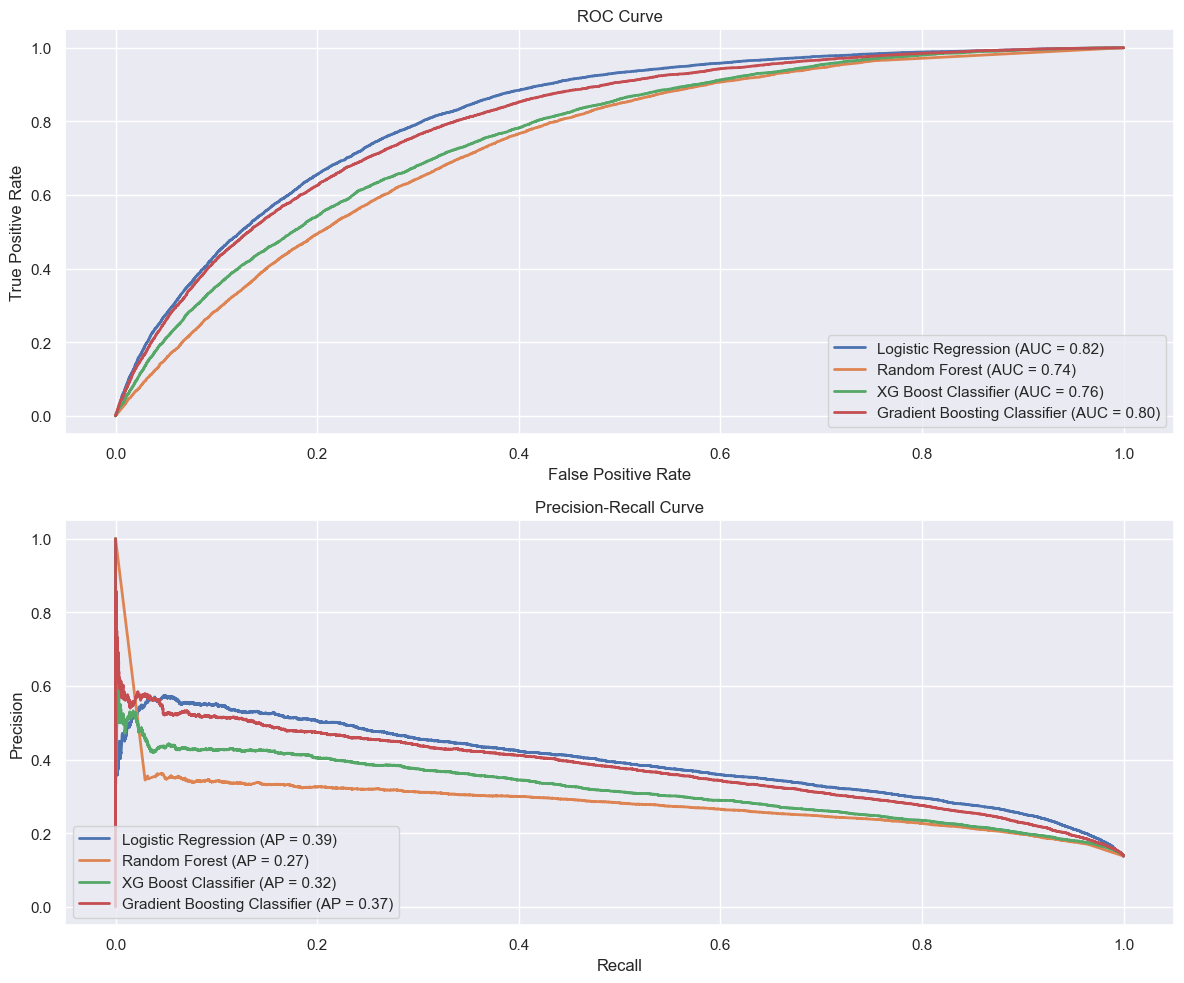

In [17]:

res_df, _ = model_training_with_tuning(X_train, y_train, X_test, y_test, resample_method='smote', axes_cmap='Purples')
res_df['Resampling'] = 'SMOTE'
res_df['Tuning'] = 'Tuned'
all_results.append(res_df)


### Training model NO TUNING (original)



Training Logistic Regression (no tuning, original)...
Saved Logistic_Regression_no_tuning_original to ../models/Logistic_Regression_no_tuning_original_model.pkl

Training Random Forest (no tuning, original)...
Saved Random_Forest_no_tuning_original to ../models/Random_Forest_no_tuning_original_model.pkl

Training XG Boost Classifier (no tuning, original)...
Saved XG_Boost_Classifier_no_tuning_original to ../models/XG_Boost_Classifier_no_tuning_original_model.pkl

Training Gradient Boosting Classifier (no tuning, original)...
Saved Gradient_Boosting_Classifier_no_tuning_original to ../models/Gradient_Boosting_Classifier_no_tuning_original_model.pkl
                          Model  Test Accuracy  Precision    Recall  F1-Score  \
3  Gradient Boosting Classifier       0.868259   0.838736  0.868259  0.836574   
2           XG Boost Classifier       0.866623   0.835077  0.866623  0.833748   
0           Logistic Regression       0.865500   0.832645  0.865500  0.832315   
1                 R

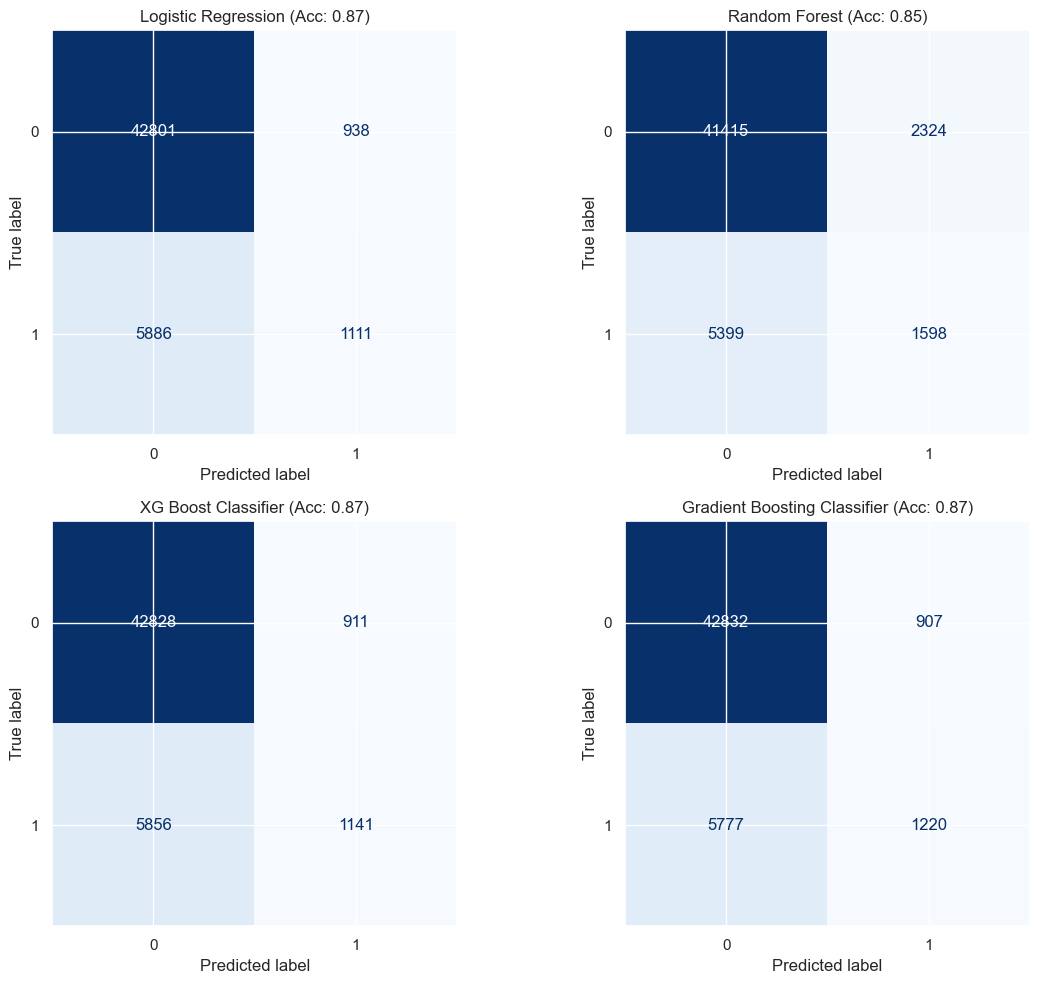

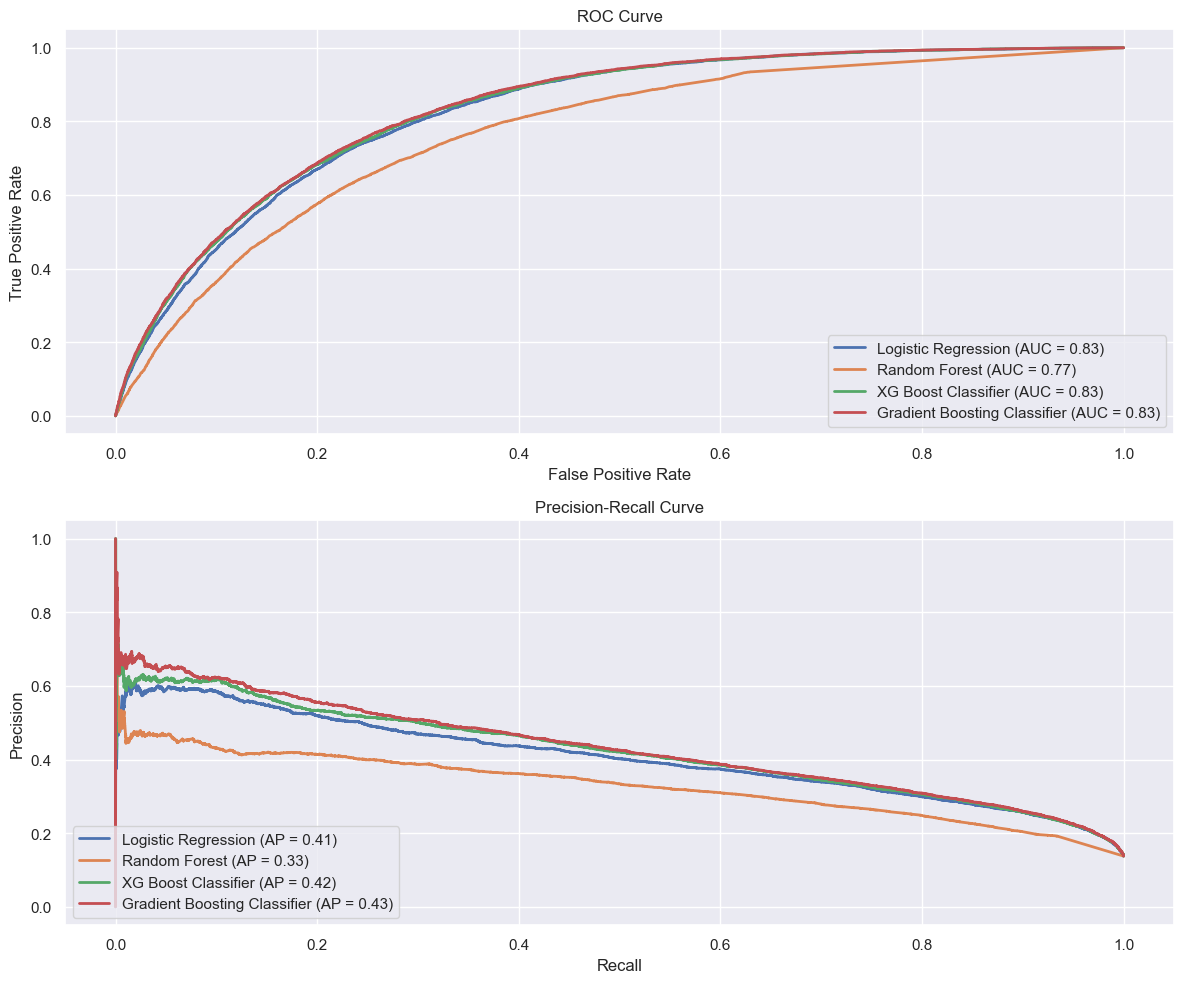

In [18]:


res_df, _ = model_training_with_no_tuning(X_train, y_train, X_test, y_test, resample_method=None, axes_cmap='Oranges')
res_df['Resampling'] = 'Original'
res_df['Tuning'] = 'No Tuning'
all_results.append(res_df)

### Training model NO TUNING (undersampling)



Training Logistic Regression (no tuning, resampled)...
Saved Logistic_Regression_no_tuning_resampled_under to ../models/Logistic_Regression_no_tuning_resampled_under_model.pkl

Training Random Forest (no tuning, resampled)...
Saved Random_Forest_no_tuning_resampled_under to ../models/Random_Forest_no_tuning_resampled_under_model.pkl

Training XG Boost Classifier (no tuning, resampled)...
Saved XG_Boost_Classifier_no_tuning_resampled_under to ../models/XG_Boost_Classifier_no_tuning_resampled_under_model.pkl

Training Gradient Boosting Classifier (no tuning, resampled)...
Saved Gradient_Boosting_Classifier_no_tuning_resampled_under to ../models/Gradient_Boosting_Classifier_no_tuning_resampled_under_model.pkl
                          Model  Test Accuracy  Precision    Recall  F1-Score  \
0           Logistic Regression       0.729916   0.864233  0.729916  0.769484   
3  Gradient Boosting Classifier       0.720514   0.868052  0.720514  0.762374   
2           XG Boost Classifier       0.

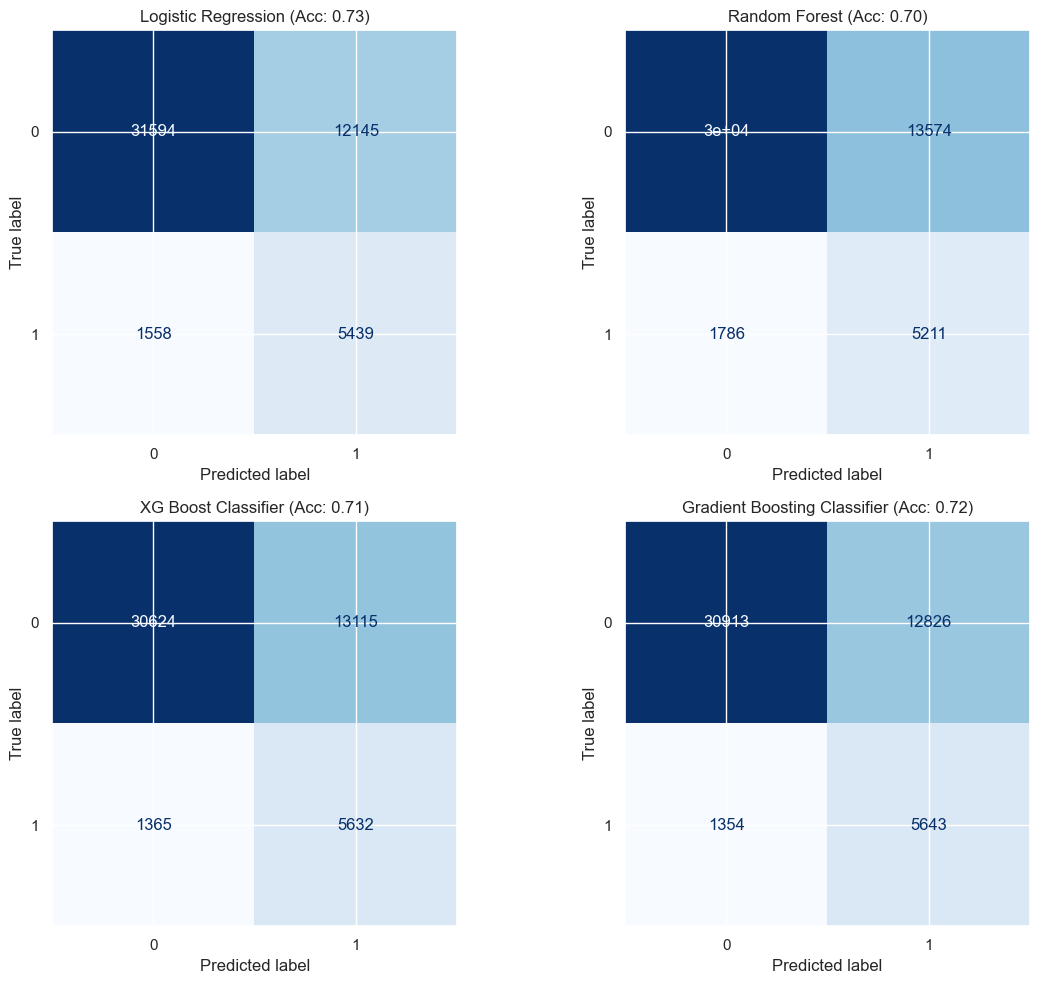

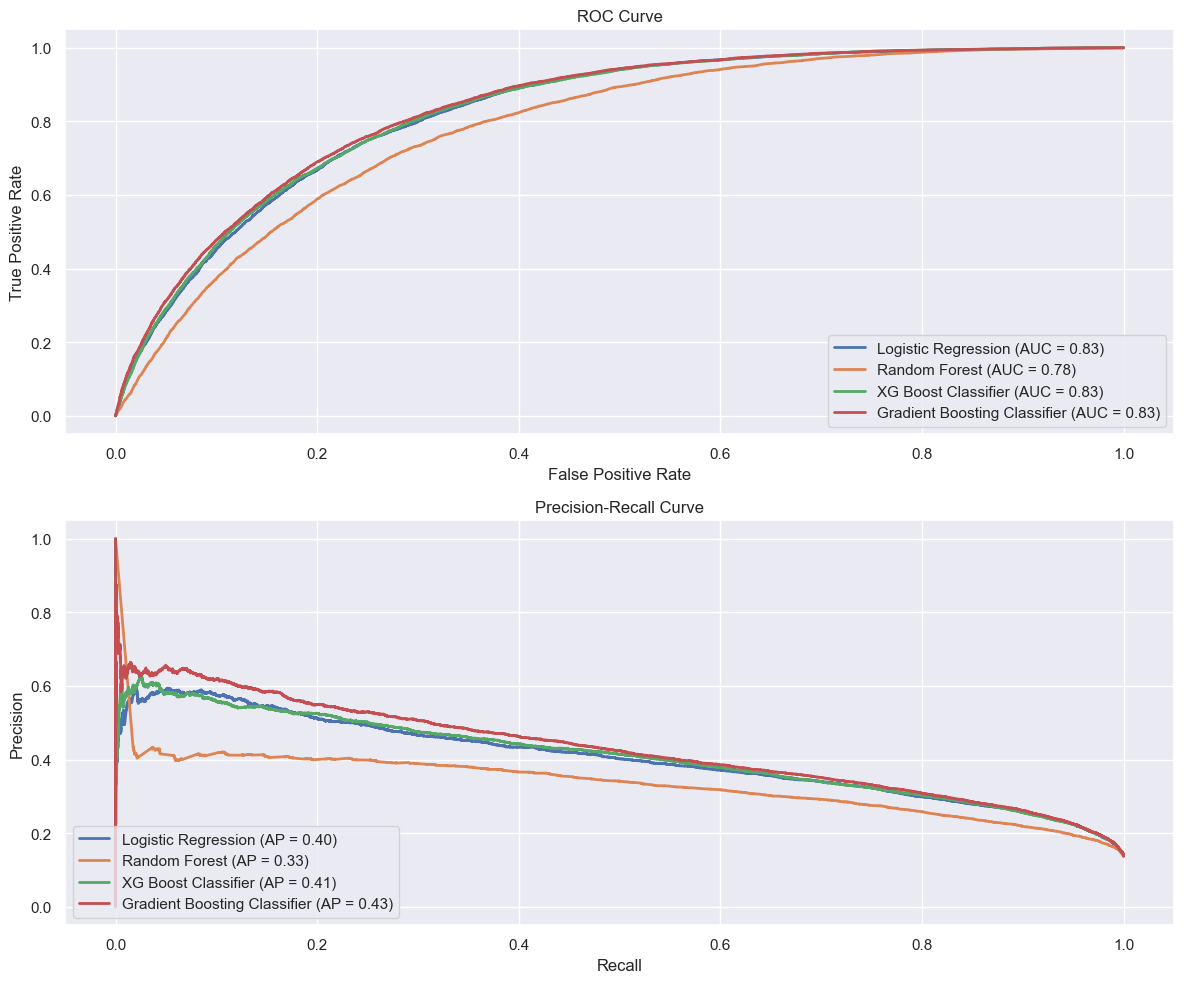

In [19]:

res_df, _ = model_training_with_no_tuning(X_train, y_train, X_test, y_test, resample_method='under', axes_cmap='Reds')
res_df['Resampling'] = 'Under'
res_df['Tuning'] = 'No Tuning'
all_results.append(res_df)

### Training model NO TUNING (SMOTE)



Training Logistic Regression (no tuning, resampled)...
Saved Logistic_Regression_no_tuning_resampled_smote to ../models/Logistic_Regression_no_tuning_resampled_smote_model.pkl

Training Random Forest (no tuning, resampled)...
Saved Random_Forest_no_tuning_resampled_smote to ../models/Random_Forest_no_tuning_resampled_smote_model.pkl

Training XG Boost Classifier (no tuning, resampled)...
Saved XG_Boost_Classifier_no_tuning_resampled_smote to ../models/XG_Boost_Classifier_no_tuning_resampled_smote_model.pkl

Training Gradient Boosting Classifier (no tuning, resampled)...
Saved Gradient_Boosting_Classifier_no_tuning_resampled_smote to ../models/Gradient_Boosting_Classifier_no_tuning_resampled_smote_model.pkl
                          Model  Test Accuracy  Precision    Recall  F1-Score  \
1                 Random Forest       0.754730   0.822063  0.754730  0.780938   
0           Logistic Regression       0.714877   0.864091  0.714877  0.757643   
2           XG Boost Classifier       0.

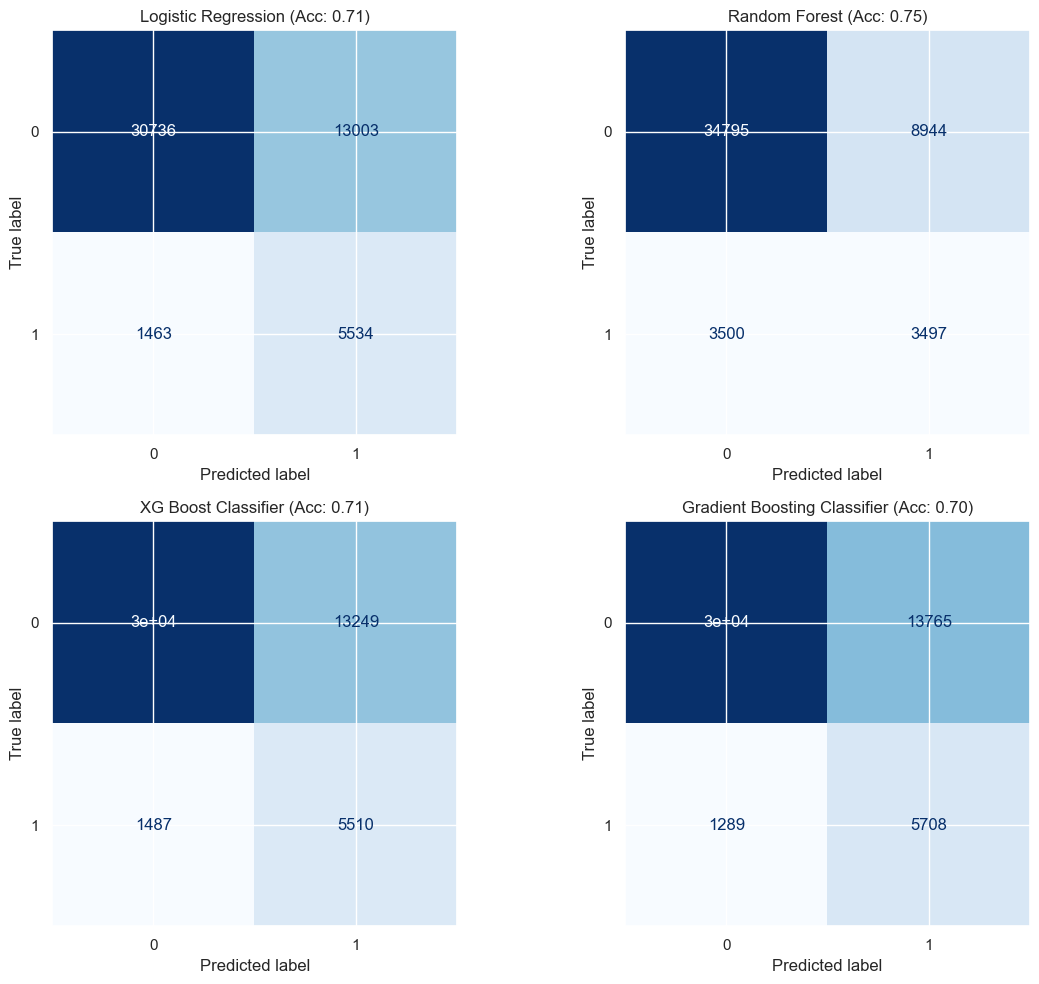

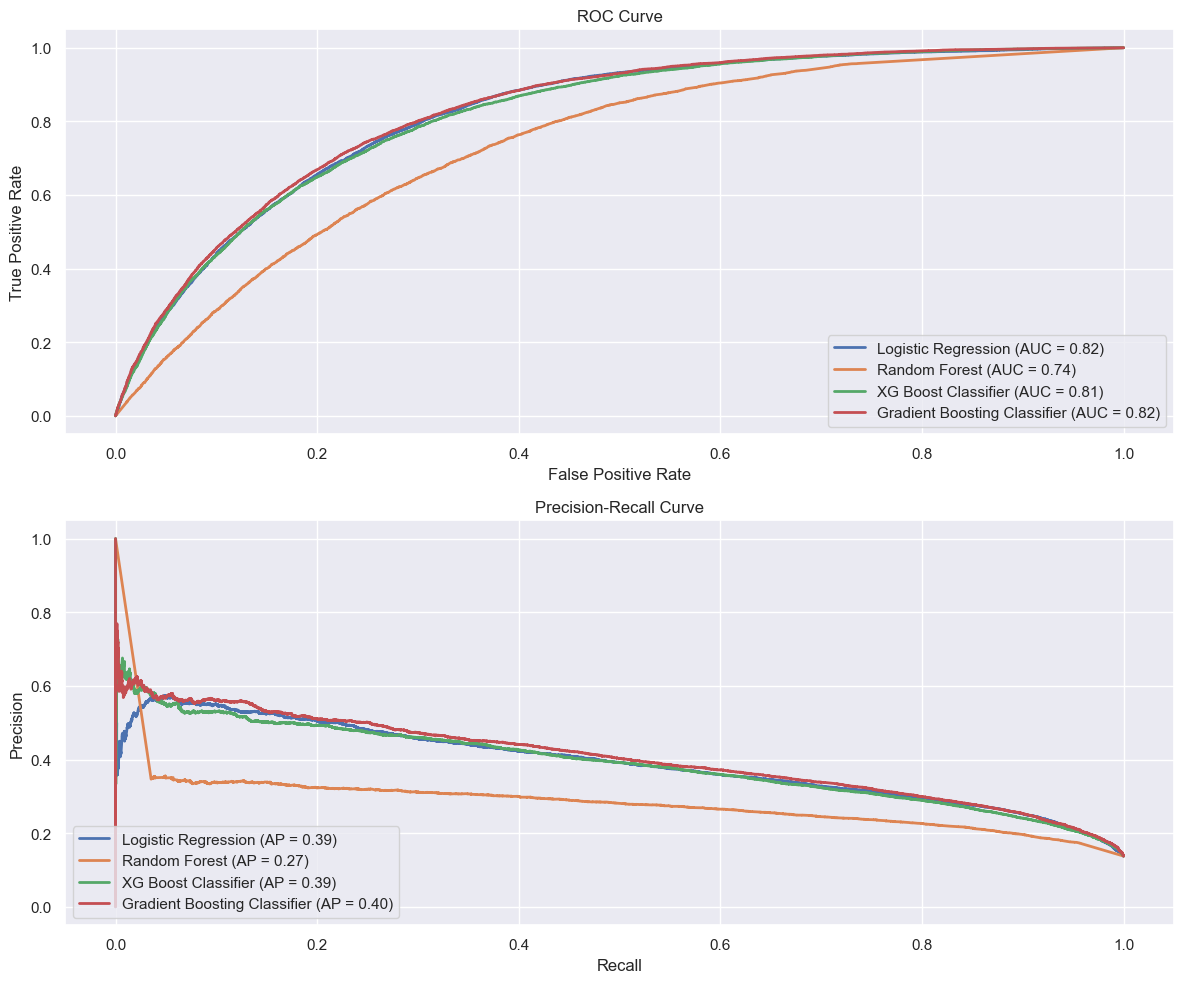

In [20]:

res_df, _ = model_training_with_no_tuning(X_train, y_train, X_test, y_test, resample_method='smote', axes_cmap='Greys')
res_df['Resampling'] = 'SMOTE'
res_df['Tuning'] = 'No Tuning'
all_results.append(res_df)

In [21]:

final_results_df = pd.concat(all_results, ignore_index=True)
final_results_df.sort_values(by='Test Accuracy', ascending=False, inplace=True)
display(final_results_df)

,Model,Test Accuracy,Precision,Recall,F1-Score,ROC-AUC,Avg Precision,Resampling,Tuning
15,Gradient Boosting Classifier,0.868259,0.838736,0.868259,0.836574,0.833852,0.431416,Original,No Tuning
14,XG Boost Classifier,0.866623,0.835077,0.866623,0.833748,0.831047,0.422183,Original,No Tuning
12,Logistic Regression,0.865500,0.832645,0.865500,0.832315,0.825852,0.405894,Original,No Tuning
3,Gradient Boosting Classifier,0.863213,0.829818,0.863213,0.833201,0.824097,0.399565,Original,Tuned
13,Random Forest,0.847781,0.818857,0.847781,0.828931,0.768715,0.326992,Original,No Tuning
2,XG Boost Classifier,0.815437,0.854490,0.815437,0.830569,0.833676,0.430903,Original,Tuned
9,Random Forest,0.755026,0.822327,0.755026,0.781205,0.737856,0.274315,SMOTE,Tuned
21,Random Forest,0.754730,0.822063,0.754730,0.780938,0.736533,0.273552,SMOTE,No Tuning
10,XG Boost Classifier,0.743949,0.834492,0.743949,0.776123,0.760215,0.317412,SMOTE,Tuned
1,Random Forest,0.732931,0.866623,0.732931,0.772041,0.832213,0.428342,Original,Tuned


### Model Deployment

Now it's time to deploy a trained model. Model is deployed and used in production, as shown in this diagram. 

1. The process begins with the user which could be a real person or another application—interacting with an API server. 
2. This server acts as the gateway, receiving the user’s input data and passing it along to the model inference component, where the actual prediction happens using a trained model.
3. The model inference step is powered by the latest version of the trained model, which is registered and tracked in the model registry for version control and easy updates. 
4. Behind the scenes, whenever we want to improve the model, the training pipeline kicks in. It takes in new training data, processes it with feature engineering to create better inputs, and retrains the model as needed. 
5. The newly trained model is then sent back to the registry and used for future inferences.

This pipeline ensures that user inputs flow smoothly all the way from the user interface to a smart prediction and back, while keeping the system flexible, updatable, and robust for real-world use.

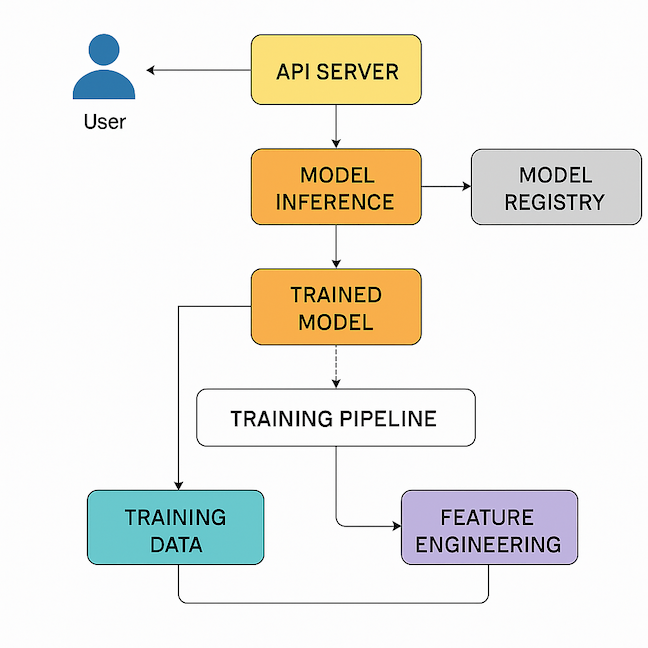

### Discussion and conclusions

Finally, all the numbers come together in our results table. This table lists out every model we tried—Logistic Regression, Random Forest, XGBoost, and Gradient Boosting—under all the different training scenarios, like original data, undersampling, SMOTE, with and without tuning. It shows each one’s accuracy, precision, recall, F1-score, ROC-AUC, and more. What’s really helpful here is how you can instantly spot which setup performed best—like Gradient Boosting on the original, unbalanced data with no tuning, hitting 86.8% accuracy and an AUC of 0.83. 
